In [2]:
# Import all the necessary libraries/packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Import warnings and set filter warnings to ignore due to the use of deprecated code  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Sources: https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set/
# Load the dataset
df = pd.read_csv('beer_profile_and_ratings.csv')

In [3]:
# Verify the data is loaded properly
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [4]:
# Explore the dataset
print(df.info())
print(df.describe())

# Handle missing values if any
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

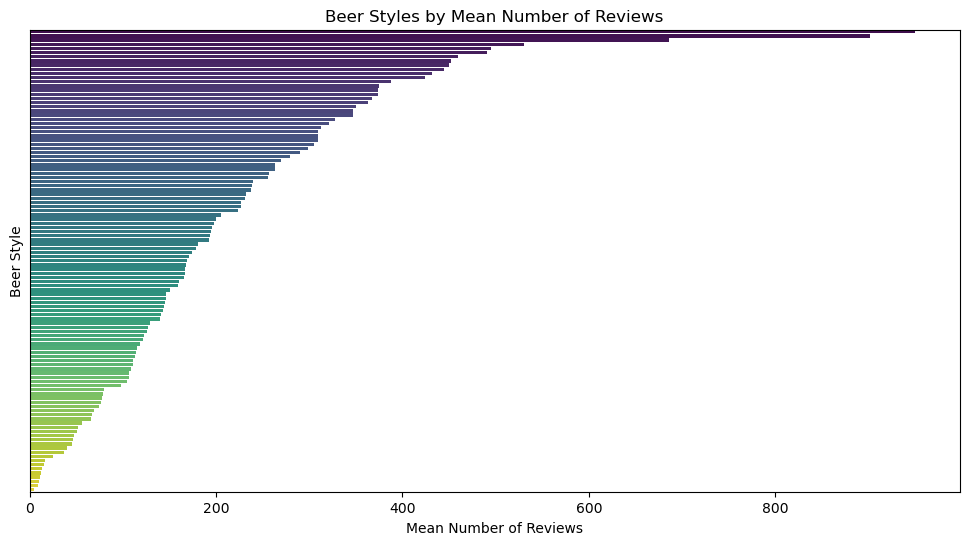

In [5]:
# Exploratory Data Analysis (EDA)

# Group by beer style and calculate the mean number of reviews
style_reviews = df.groupby('Style')['number_of_reviews'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6)) # Set the figure size

# Create a horizontal bar plot using Seaborn
sns.barplot(x=style_reviews.values, y=style_reviews.index, palette='viridis')
plt.xlabel('Mean Number of Reviews')
plt.ylabel('Beer Style')
plt.title('Beer Styles by Mean Number of Reviews')
plt.yticks([])  # Disable y-axis labels

# Display the plot
plt.show()

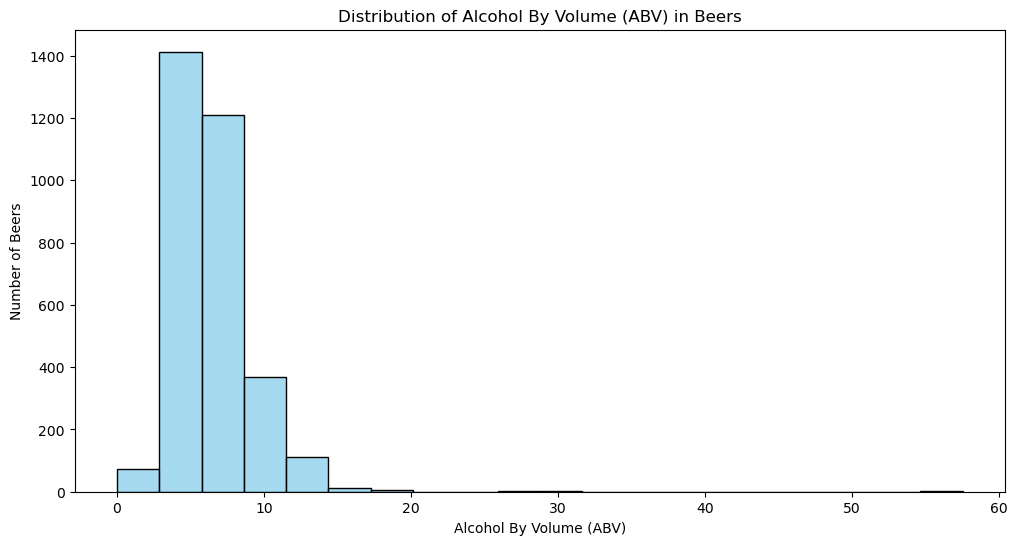

In [6]:
# Create a bar chart for ABV (Alcohol By Volume)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a histogram plot using Seaborn
sns.histplot(df['ABV'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol By Volume (ABV)')
plt.ylabel('Number of Beers')
plt.title('Distribution of Alcohol By Volume (ABV) in Beers')

# Display the plot
plt.show()

In [7]:
# Feature Selection

# Select relevant features for analysis
features = ['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']
X = df[features]
y = df['review_overall']

In [8]:
# Train a Model to Predict Overall Review

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict overall reviews on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model by calculating Mean Absolute Error (MAE) and R-squared (R2) score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.24
R-squared: 0.42


In [10]:
# Identify Important Features

# Display feature importance and print the results
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

Spices         0.106063
Min IBU        0.104986
Alcohol        0.100691
Body           0.100620
ABV            0.097595
Fruits         0.090451
Bitter         0.066815
Malty          0.066727
Sour           0.063147
Astringency    0.051740
Sweet          0.051394
Hoppy          0.049929
Max IBU        0.033909
Salty          0.015931
dtype: float64


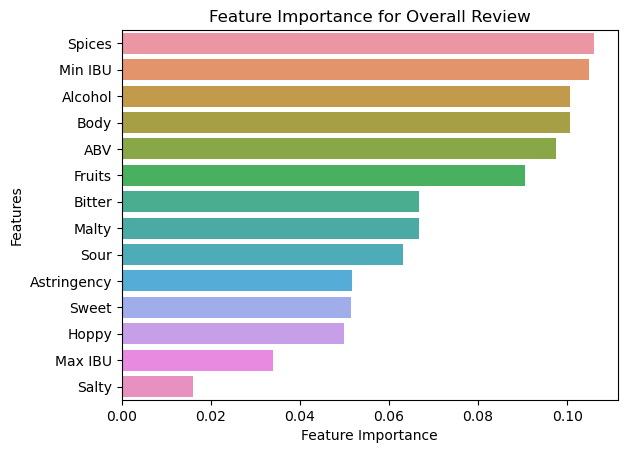

In [11]:
# Visualize feature importance

# Create a bar plot using Seaborn
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Overall Review')

# Display the plot
plt.show()

In [12]:
# Identify popular styles based on both mean number of reviews and a minimum number of reviews threshold

# Set the minimum reviews threshold
min_reviews_threshold = 50  # Adjust this threshold as needed

# Filter DataFrame to include only styles with reviews above the threshold
popular_styles = df[df['number_of_reviews'] >= min_reviews_threshold]\
                    .groupby('Style')['number_of_reviews'].mean().sort_values(ascending=False).head(30).index

In [13]:
# Predict overall reviews for the entire dataset
df['predicted_review'] = model.predict(df[features])

# Filter the dataset for popular styles
popular_beers_df = df[df['Style'].isin(popular_styles)]

# Create a DataFrame with the highest-rated beers in each popular style, considering feature importance
highest_rated_beers = popular_beers_df.sort_values(by=['Style', 'predicted_review'], ascending=[True, False])\
                                      .groupby('Style').head(20)[['Style', 'Beer Name (Full)', 'predicted_review'] + features]

# Display the results
print(highest_rated_beers)

# Save the DataFrame to a CSV file
highest_rated_beers.to_csv('highest_rated_beers_popular_styles.csv', index=False)

                     Style                                   Beer Name (Full)  \
292         Bock - Eisbock  High Point Brewing Company Ramstein Winter Whe...   
294         Bock - Eisbock          Southampton Publick House Double Ice Bock   
301         Bock - Eisbock             Sly Fox Brewing Company Eis Instigator   
293         Bock - Eisbock  Brauerei Hofstetten Krammer GmbH & Co. KG Gran...   
290         Bock - Eisbock          Kuhnhenn Brewing Company Kuhnhenn Eisbock   
...                    ...                                                ...   
3104  Wheat Beer - Witbier                        Unibroue Blanche De Chambly   
3115  Wheat Beer - Witbier              Dogfish Head Brewery Positive Contact   
3120  Wheat Beer - Witbier  New Belgium Brewing Mothership Wit (Organic Wh...   
3110  Wheat Beer - Witbier                          Harpoon Brewery UFO White   
3111  Wheat Beer - Witbier  Boston Beer Company (Samuel Adams) Samuel Adam...   

      predicted_review   AB

In [14]:
# Save the highest_rated_beers DataFrame to a CSV file
highest_rated_beers.to_csv('highest_rated_beers.csv', index=False)